# Problème 4 : Générateurs de nombres pseudo-aléatoires

Une procédure **déterministe** ne permet pas de produire des nombres réellement **aléatoires**. En revanche, elle peut produire des nombres qui y ressemblent, des **nombres pseudo-aléatoires**.

Un **générateur de nombres pseudo-aléatoires** fonctionne en général de la manière suivante. On commence par l'initialiser avec une valeur : la **graine** (**seed** en anglais). Cette graine peut-être fournie par l'utilisateur ou produite automatiquement à partir de données aléatoires du système (l'heure en millisecondes ou la température du processeur par exemple). Ensuite, à chaque fois qu'un nouveau nombre pseudo-aléatoire est demandé, le générateur applique une certaine fonction $\varphi$ à sa valeur courante et renvoie cette nouvelle valeur. En termes mathématiques, les nombres pseudo-aléatoires produits par le générateur sont les nombres de la suite

\begin{equation}
\begin{cases}
x_0=d\\
x_{n+1}=\varphi(x_n)
\end{cases}
\tag{$\star$}
\end{equation}
où $d$ est la graine.

**L'objectif principal de ce problème est de programmer et d'étudier un certain type de générateurs : les générateurs à congruence linéaire.**

## A. Générateurs à congruence linéaire

Dans les générateurs **à congruence linéaire**, la fonction $\varphi$  utilisée est de la forme :

\begin{equation}
\tag{$\star\star$}
\varphi : x \mapsto ax+c \ \operatorname{mod} m
\end{equation}

où $m \in \mathbb{N}^*$, $a\in\{1,\ldots,m-1\}$, $c\in\{0,\ldots,m-1\}$ et $\operatorname{mod} m$ désigne le reste modulo $m$. 

Les nombres $a$, $c$, $m$ sont appelés les **paramètres** du générateur.

### A.1. Classe `GCL`

Nous allons d'abord écrire une classe `GCL` pour créer et utiliser des générateurs à congruence linéaire. Un générateur à congruence linéaire sera représenté par les attributs suivants :

 `a`, `c` et `m` : les paramètres du générateur ;
 
 `value` : la valeur *courante* du générateur (c'est-à-dire la dernière valeur calculée dans la suite associée au générateur).
 
- Créer une classe `GCL` contenant :
    * la méthode de construction `__init__` ;
    * une méthode `random` :
    * une méthode `seed`.

La méthode `__init__` de cette classe prendra en paramètres les paramètres du générateur. Par défaut, la valeur initiale (la graine) du générateur sera produite en utilisant la fonction `time` du module `time`.

La méthode `random` appliquera la fontion $\varphi$ à la valeur courante et renverra cette nouvelle valeur.

La méthode `seed` prendra en paramètre une valeur entière et réinitialisera le générateur avec cette valeur entière comme graine (autrement dit, elle remplacera la valeur courante par la valeur fournie).
        
Avec cette classe, voilà par exemple comment créer un générateur de paramètres $(5,1,16)$ et afficher les 2 premiers nombres pseudo-aléatoires produits par ce générateur
```python

rd = GCL(5, 1, 16)
print(rd.random())
print(rd.random())
```

In [112]:
import time

class GCL:
    def __init__(self, a, c, m):
        self.value = int(time.time())
        self.a = a
        self.c = c
        self.m = m
        
    def random(self):
        self.value = (self.a * self.value + self.c) % self.m
        return self.value
    
    def seed(self, entier):
        self.value = entier
        return self.value
    
    def uniform(self, a, b):
        x = rd.random() / self.m 
        return a + (b - a)* x
    
    def randint(self, a, b):
        return int(rd.uniform(a, b))
    
    def choice(self, lst):
        indice = rd.randint(0, len(lst))
        return lst[indice]

- Créer un générateur `rd` de paramètres $(5,1,16)$ et afficher les 20 premiers nombres pseudo-aléatoires produits par ce générateur.

In [114]:
rd = GCL(5, 1, 16)
for i in range(20):
    print(rd.random(), end=" ")

15 12 13 2 11 8 9 14 7 4 5 10 3 0 1 6 15 12 13 2 

- Fixer la graine du générateur à 10. Afficher les 20 premiers nombres pseudo-aléatoires produits par ce générateur avec cette graine.

In [105]:
rd.seed(10)
for i in range(20):
    print(rd.random(), end=" ")

3 0 1 6 15 12 13 2 11 8 9 14 7 4 5 10 3 0 1 6 

### A.2. Période des suites générées

* Rappeler la définition d'une suite **périodique** et la définition de la **période** d'une suite périodique.

La suite est dite périodique (de période p) s'il existe $p \in\mathbb{N}$ non nul tel que pour tout $n \in\mathbb{N}$, $U_{n} = U_{n + p}$.

* Montrer qu'une suite récurrente qui prend la même valeur à deux rangs distincts $n_1$ et $n_2$ est nécessairement périodique (à partir du rang $n_1$). Que peut-on dire de sa période ?

Par récurrence, montrons que $\forall n \in \mathbb{N}$, $u_{n} = u_{n+p}$:

* Initialisation: On sait que $u_{n1} = u_{n2}$.

On pose $n_{1} = n$ et $n_{2} = n + p$

$u_{n1} = u_{n2} \Leftrightarrow u_{n1} = u_{n2}$


* Hérédité: On suppose que $u_{n} = u_{n+p}$ est vrai. Montrons alors $u_{n+1} = u_{n+p+1}$ .

On sait que $\forall n \in \mathbb{N}, u_{n+1} = f(u_n)$

Donc $u_{n} = u_{n+p} \Leftrightarrow f(u_n) = f(u_{n+p}) \Leftrightarrow u_{n+1} = u_{n+p+1}$

Finalement, $u_{n} = u_{n+p}$, donc elle est nécessairement périodique en $p$.

Le **principe des tiroirs** énonce que si l'on range $n$ chaussettes dans $m$ tiroirs (avec $n>m$), alors il y au moins un tiroir contenant plus d'une chaussette.

Par exemple, si l'on considère $n$ nombres ne pouvant prendre que $m$ valeurs différentes (avec $n>m$), alors, d'après le principe des tiroirs, il y a nécessairement deux nombres ayant la même valeur. 

* Soit $(x_n)_{n\in\mathbb{N}}$ une suite du type $(\star)$. En appliquant le principe de tiroirs aux nombres $x_0, x_1, \ldots, x_m$, montrer que la suite $(x_n)_{n\in\mathbb{N}}$ est périodique (à partir d'un certain rang). Que peut-on dire de sa période ?

La suite $(x_n)_{n\in\mathbb{N}}$ est de type $(\star)$: $x_{n + 1} = \varphi x_n $ donc c'est une suite récurrente.

Ainsi, $ \forall n \in \mathbb{N}, x_{n + 1} = \varphi x_n$

$\varphi x_n  = a \times x_n + c \qquad mod(m) \qquad \qquad a \in${$1,...,m-1$} et $c \in${$1,...,m-1$}

Donc on a $m$ valeurs possibles.

Les valeurs $x_0, x_1, \ldots, x_m$ sont des valeurs possibles de $X_{n}$, et comme $X_{m}$ n'est pas le dernier terme de la suite $X_{n}$, on a $m < n$.

Les valeurs comprises entre $x_{m}$ et $x_{n}$ appartiennent bien à la suite $(x_n)_{n\in\mathbb{N}}$. Donc d'après le principe des tiroirs, il existe au moins un nombre compris entre $x_{m+1}$ et $x_{n}$ et un nombre entre $x_{0}$ et $x_{m}$ tel qu'ils auront la même valeur.

On en conclut que la suite $(x_n)_{n\in\mathbb{N}}$ est donc périodique, de période p.

Il est préférable d'utiliser un générateur qui produit des suites de périodes les plus longues possibles. On dit qu'un générateur de paramètres $(a,c,m)$ est de **période maximale** s'il produit des suites de période $m$ pour toutes les graines.

On peut démontrer que si un générateur produit une suite de période $m$ pour une graine particulière, alors il produit des suites de période $m$ pour toutes les graines.

- Pour chacun des paramètres ci-dessous, déterminer (expérimentalement) si le générateur à congruence linéaire associé est de période maximale.
    - $(5, 4, 8)$
    - $(5, 5, 8)$
    - $(5, 1, 16)$
    - $(7, 1, 16)$

In [4]:
#rd = GCL(5, 4, 8)
#rd = GCL(5, 5, 8)
#rd = GCL(5, 1, 16)
rd = GCL(7, 1, 16)

rd.seed(6)
for i in range(20):   
    print(rd.random(), end=" ")

11 14 3 6 11 14 3 6 11 14 3 6 11 14 3 6 11 14 3 6 

$(5, 4, 8)$ le générateur à congruence linéaire associé n'est pas de période maximale.


$(5, 5, 8)$ le générateur à congruence linéaire associé est de période maximale.


$(5, 1, 16)$ le générateur à congruence linéaire associé est de période maximale.


$(7, 1, 16)$ le générateur à congruence linéaire associé n'est pas de période maximale.

On dispose du théorème suivant pour déterminer si un générateur est de période maximale.

**Théorème.** Dans le cas où $m=2^e$, un générateur est de période maximale si et seulement si $c$ est impair et $a \equiv 1 [4]$. 

* Vérifier qu'en appliquant ce théorème aux 4 générateurs précédents, on retrouve les résultats déterminés expérimentalement.

Pour $(5, 4, 8)$ on a $c=4$, $c$ est impair donc ce n'est pas un générateur de période maximale.

Pour $(5, 5, 8)$ on a $c=5$, $c$ est bien impair, de plus $a=5$ avec $a \equiv 1 [4]$ donc c'est bien un générateur de période maximale.

Pour $(5, 1, 16)$ on a $c=1$, $c$ est bien impair, de plus $a=5$ avec $a \equiv 1 [4]$ donc c'est bien un générateur de période maximale.

Pour $(7, 1, 16)$ on a $a=7$ cependant $7$ n'est pas congrus 1 modulo 4.

### A.3. Tests de quelques générateurs à congruence linéaire

- Créer les générateurs à congruence linéaire de paramètres suivants :
    - `rd1` : $(9,5,2^{31})$
    - `rd2` : $(11,5,2^{31})$
    - `rd3` : $(1664523,1013904223,2^{31})$
    - `rd4` : $(1664525,1013904223,2^{31})$

In [5]:
print(9 % 4)
print(11 % 4)
print(1664523 % 4)
print(1664525 % 4)

1
3
3
1


* Ces générateurs sont-ils de période maximale ?

 `rd1` : $(9,5,2^{31})$ oui
 
 `rd2` : $(11,5,2^{31})$ non 
 
 `rd3` : $(1664523,1013904223,2^{31})$ non
 
 `rd4` : $(1664525,1013904223,2^{31})$ oui

**Premier test.** Soit $n$ un entier fixé et $m$ un entier grand devant $n$. Si l'on tire aléatoirement un nombre $x$ dans $\{0,\ldots,m-1\}$ suivant une loi uniforme, il y a (à peu près) autant de chance que $x \equiv 0 \pmod n$ ou que $x \equiv 1 \pmod n$ ou que $x \equiv 2 \pmod n$, etc. On aimerait donc que les nombres pseudo-aléatoires produits par nos générateurs vérifient aussi cette propriété.

- Ecrire une fonction `test_modulo` qui tire un échantillon de nombres pseudo-aléatoires produits par un générateur, calcule les congruences modulo $n$ (où $n$ est donné) et affiche la répartition des congruences sous forme d'histogramme. Cette fonction prendra comme paramètres : `rd`, le générateur de nombres pseudo-aléatoires, `nbsample`, la taille de l'échantillon, et `n`, le nombre modulo lequel on calcule les congruences. Indication : Pour tracer l'histogramme, on pourra utiliser la commande `bar` du module `matplotlib.pyplot`.

In [6]:
import matplotlib.pyplot as plt

def test_modulo(rd, nbsample, n):
    lst_x, lst_y = [], []
    
    for i in range(n):
        lst_x.append(i)        
        lst_y.append(0)
        
    for _ in range (nbsample):
        indice = rd.random() % n
        if indice in lst_x :
            lst_y[indice] += 1
            
    plt.bar(lst_x, lst_y)
    plt.show()

- Tester les différents générateurs pour des congruences modulo 10 avec des échantillons de 10 000 nombres.

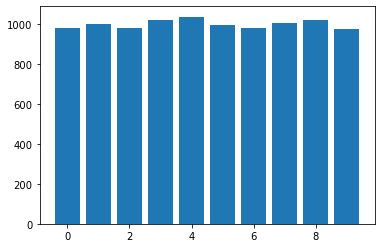

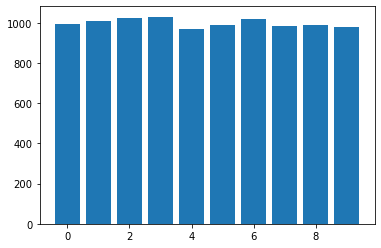

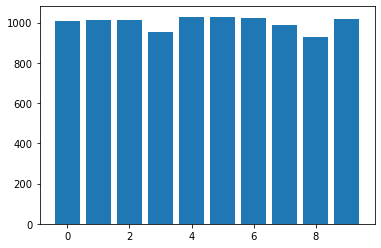

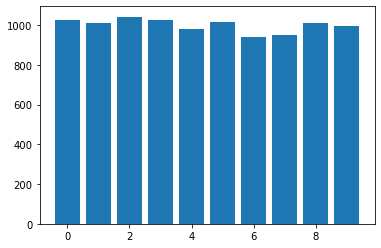

In [7]:
test_modulo(GCL(9, 5, 2**31), 10000, 10)
test_modulo(GCL(11, 5, 2**31), 10000, 10)
test_modulo(GCL(1664523, 1013904223, 2**31), 10000, 10)
test_modulo(GCL(1664525, 1013904223, 2**31), 10000, 10)

- Tester les différents générateurs pour des congruences modulo 4 avec des échantillons de 4 000 nombres.

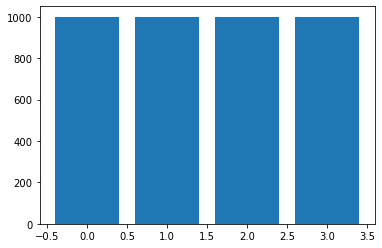

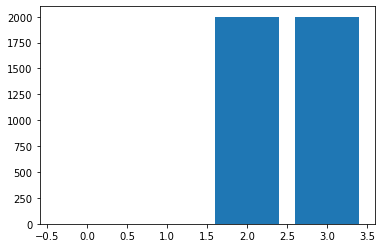

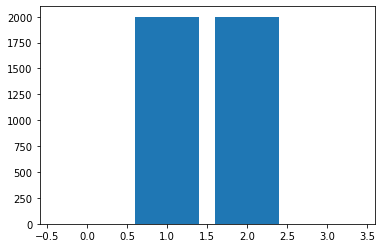

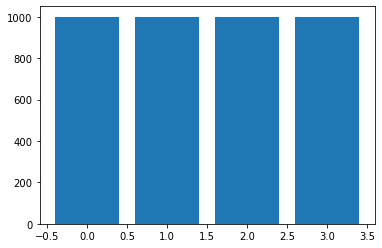

In [8]:
test_modulo(GCL(9, 5, 2**31), 4000, 4)
test_modulo(GCL(11, 5, 2**31), 4000, 4)
test_modulo(GCL(1664523, 1013904223, 2**31), 4000, 4)
test_modulo(GCL(1664525, 1013904223, 2**31), 4000, 4)

- Parmi les générateurs, lesquels réussissent ce premier test ?

Les générateurs $(9,5,2^{31})$ et $(1664525,1013904223,2^{31})$ réussissent le premier test.

**Deuxième test.** Si l'on tire aléatoirement trois nombres $x_1,x_2,x_3$ de façon indépendante, suivant une même loi, il y autant de chance que $x_1<x_2<x_3$ ou que $x_1<x_3<x_2$ ou que $x_2<x_1<x_3$, etc. On aimerait donc que les nombres pseudo-aléatoires produits par nos générateurs vérifient aussi cette propriété.

- Ecrire une fonction `test_ordre` qui tire un échantillon de triplets de nombres pseudo-aléatoires produits par un générateur, détermine l'ordre de ces triplets et affiche la répartition des ordres trouvés dans l'échantillon sous forme d'histogramme. Cette fonction prendra comme paramètres : `rd`, le générateur de nombres pseudo-aléatoires, et `nbsample`, la taille de l'échantillon.

In [110]:
def test_ordre(rd, nbsample):
    lst_x, lst_y = ["x1 < x2 < x3", "x1 < x3 < x2", "x2 < x1 < x3", "x2 < x3 < x1", "x3 < x1 < x2", "x3 < x2 < x1"], []
    for i in range(6):        
        lst_y.append(0)
        
    for _ in range(nbsample):
        lst = []
        for j in range(3):
            lst.append(rd.random())
            
        if lst[0] < lst[1] and lst[1] < lst[2]: #x1 < x2 < x3
            lst_y[0] += 1
        elif lst[0] < lst[2] and lst[2] < lst[1]: #x1 < x3 < x2
            lst_y[1] += 1
        elif lst[1] < lst[0] and lst[0] < lst[2]: #x2 < x1 < x3
            lst_y[2] += 1   
        elif lst[1] < lst[2] and lst[2] < lst[0]: #x2 < x3 < x1
            lst_y[3] += 1 
        elif lst[2] < lst[0] and lst[0] < lst[1]: #x3 < x1 < x2
            lst_y[4] += 1 
        elif lst[2] < lst[1] and lst[1] < lst[0]: #x3 < x2 < x1
            lst_y[5] += 1 
    
    plt.figure(figsize=(9,5))
    plt.bar(lst_x,lst_y)
    plt.show()

* Tester avec un échantillon de 60 000 triplets de nombres

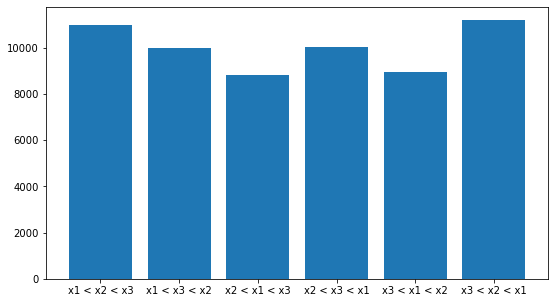

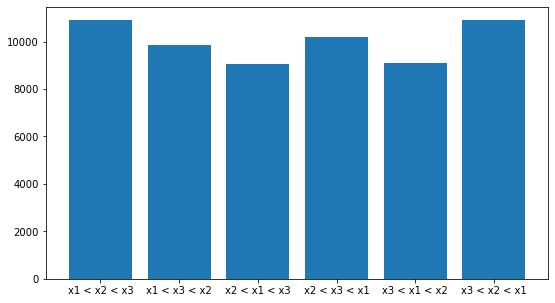

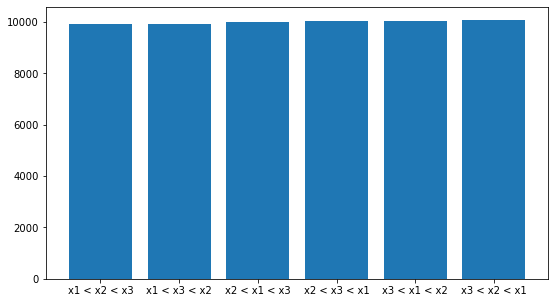

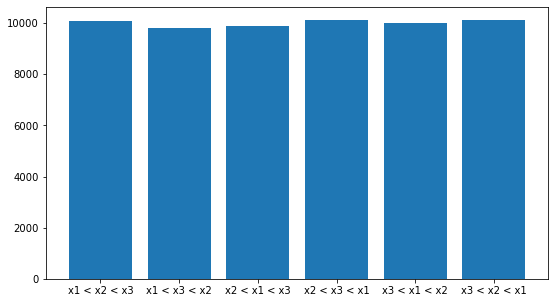

In [111]:
test_ordre(GCL(9, 5, 2**31), 60000)
test_ordre(GCL(11, 5, 2**31), 60000)
test_ordre(GCL(1664523, 1013904223, 2**31), 60000)
test_ordre(GCL(1664525, 1013904223, 2**31), 60000)

* Parmi les générateurs, lesquels réussissent ce deuxième test ?

Les générateurs réussissant le deuxième test sont $(1664523,1013904223,2^{31})$ et $(1664525,1013904223,2^{31})$.

* Finalement, au vu de ces deux tests, quels générateurs semblent être de bons générateurs.

Seul $(1664525,1013904223,2^{31})$ semble être un bon générateur.

### A.4. Fonctions aléatoires complémentaires

* Compléter la classe `GCL` avec les méthodes suivantes.
    * `uniform` prend en paramètres deux réels `a` et `b` et renvoie un nombre réel tiré selon une loi uniforme sur l'intervalle $[a, b]$.
    * `randint`prend en paramètres deux entiers `a` et `b` renvoie un nombre entier tiré selon une loi uniforme entre `a` et `b-1`. Indication : 
    * `choice` prend en paramètre une liste et renvoie un élément de la liste tiré aléatoirement.
    
Indication pour la méthode `uniform` : En divisant par $m$ le nombre entier pseudo-aléatoire fourni par la méthode `random`, on obtient un nombre réel pseudo-aléatoire entre $0$ et $1$ ($1$ exclu). Il suffit ensuite d'appliquer une certaine transformation affine pour obtenir un nombre réel pseudo-aléatoire entre $a$ et $b$ ($b$ exclu).

Indication pour la méthode `randint` : Arrondir (inférieurement) le nombre réel pseudo-aléatoire fourni par l'appel à la méthode `uniform` sur l'intervalle $[a, b]$.

Indication pour la méthode `choice` : Utiliser la méthode `randint`.
    
```py
>>> rd = GCL(1664525, 1013904223, 2**31)

>>> rd.uniform(1.5, 3.5)
3.185575816487498
>>> rd.uniform(1.5, 3.5)
2.972734514132826

>>> rd.randint(10, 15)
10
>>> rd.randint(10, 15)
13

>>> lst = ['A', 'B', 'C', 'D']
>>> rd.choice(lst)
'C'
>>> rd.choice(lst)
'A'
```

In [83]:
rd = GCL(1664525, 1013904223, 2**31)
print(rd.uniform(1.5, 3.5))
print(rd.uniform(1.5, 3.5))

2.7927888073027134
1.7337474403902888


In [84]:
print(rd.randint(10, 15))
print(rd.randint(10, 15))

13
11


In [85]:
lst = ['A', 'B', 'C', 'D']
print(rd.choice(lst))
print(rd.choice(lst))

C
B


## B. Applications

### B.1. Simulation de la marche d'un ivrogne

On considère un ivrogne qui se déplace dans le plan. Il part du point de coordonnées $(0,0)$. A chaque étape, il fait un déplacement de longueur 1, aléatoirement dans l'une des quatre directions (vers le haut, vers le bas, à gauche ou à droite).

Voilà un exemple d'une telle marche d'ivrogne :
```
(0, 0)
(-1, 0)
(-1, -1)
(-1, 0)
(-2, 0)
(-2, 1)
(-3, 1)
(-3, 0)
etc.
```

* Ecrire une fonction `trace_marche` qui prend en paramètres un générateur aléatoire `rd` et un nombre d'étapes `n`, et qui simule une marche d'ivrogne à `n` étapes et l'affiche dans une fenêtre graphique.

In [81]:
def trace_marche(rd, n):
    coord = [0, 0]
    lst = [-1, 1]
    for _ in range(n):
        indice_aleatoire = rd.randint(0, 2)
        pas_aleatoire = rd.choice(lst)
        coord[indice_aleatoire] += pas_aleatoire
        plt.plot(coord[0], coord[1] ,marker='.',linestyle='', color='blue')
    plt.axis('equal')
    plt.show

* Tracer trois marches d'ivrogne à  10 000 étapes (en utilisant un bon générateur à congruence linéaire).

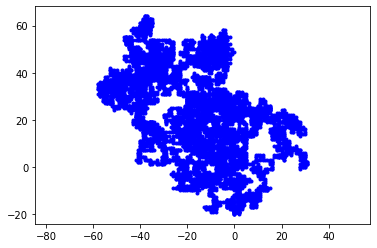

In [82]:
trace_marche(GCL(1664525, 1013904223, 2**31), 10000)

### B.2. Calcul de $\pi$ par une méthode aléatoire

En considère un carré de côté 1 et un quart de disque inscrit dans ce carré comme dans la figure ci-dessous.

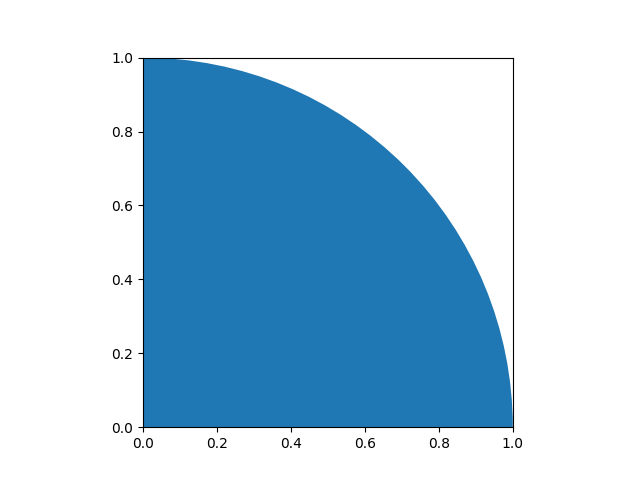

Si l'on tire un point au hasard dans ce carré, la probabilité que ce point soit dans le quart de disque est :

$$
\frac{\textrm{aire du quart de disque}}{\textrm{aire du carré}}.
$$

Ce rapport vaut $\displaystyle \frac{\pi}{4}$. Une façon de calculer $\pi$ consiste donc à tirer beaucoup de points au hasard dans le carré et de calculer la proportion de points qui tombent dans le quart de disque. Cette proportion multipliée par 4 donne une approximation de $\pi$.

* Ecrire une fonction `montecarlo` qui prend en paramètres un générateur aléatoire `rd` et un entier `n`, et calcule une approximation de $\pi$ selon la méthode décrite plus haut en utilisant `n` points. Cette fonction affichera également une représentation graphique des points tirés (avec une couleur différente selon qu'ils sont ou non dans le quart de disque).

In [16]:
import math

def montecarlo(rd, n):
    cmpt = 0
    for _ in range(n):
        x = rd.uniform(0, 1)
        y =  rd.uniform(0, 1)
        distance = math.sqrt(x**2 + y**2)
        if distance <= 1:
            cmpt += 1
            plt.plot(x, y, marker='o', linestyle='', color='blue')
        else:
            plt.plot(x, y, marker='o', linestyle='', color='red')   
    
    plt.axis('equal')
    plt.show()
    return (cmpt/n)*4  

* Calculer une approximation de $\pi$ avec 10 000 points (en utilisant un bon générateur à congruence linéaire).

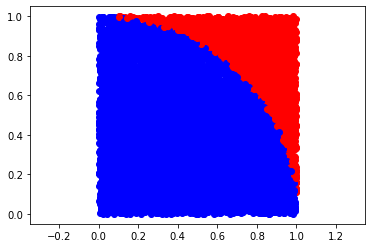

3.146

In [17]:
rd = GCL(1664525, 1013904223, 2**31)
montecarlo(rd, 10000)

* Combien de décimales correctes de $\pi$ retrouve-t-on dans cette approximation ? Cette méthode vous semble-t-elle efficace ?

On retrouve une décimale correcte dans cette approximation, cette méthode n'est donc pas très efficace.

## C. Générateur de Von Neumann

Un des premiers générateurs de nombres pseudo-aléatoires a été proposé par le mathématicien [John Von Neumann](https://fr.wikipedia.org/wiki/John_von_Neumann) dans les années 40. Il génère des nombres entiers compris entre 0 et 9999 de la façon suivante : si le dernier nombre généré est $x$, alors on calcule $x^2$, on rajoute éventuellement des $0$ en tête pour avoir 8 chiffres en base 10 et on prend les 4 chiffres du milieu comme nouveau nombre pseudo-aléatoire. Le générateur est initialisé avec une valeur initiale entre 0 et 9999 (la graine).

Par exemple si l'on initialise le générateur avec 1230, la première fois qu'on demande un nombre au générateur cela donne $5129$ car
$$1230^2 = 01\underline{5129}00 \rightarrow 5129.$$
Si on demande un nouveau nombre on aura $3066$ car
$$5129^2 = 26\underline{3066}41 \rightarrow 3066.$$

- Ecrire une classe `VN` pour représenter le générateur de Von Neumann sur le modèle de la classe écrite précédemment pour les générateurs à congruence linéaire.

In [43]:
class VN:
    def __init__(self):
        self.x = str(int(time.time()))
        self.x = self.x[:4]
        
    def random(self):
        self.x = str(int(self.x) ** 2)
        self.x = "0" * (8 - len(self.x)) + self.x
        self.x = self.x[2:6]
        return self.x
    
    def seed(self, entier):
        self.x = entier
        return self.x
    

- Fixer la graine à 3674. Afficher les 20 premiers nombres produits par le générateur de Von Neumann.

In [65]:
v = VN()    
v.seed(3674)
for _ in range(20):
    print(v.random(), end=" ")

4982 8203 2892 3636 2204 8576 5477 9975 5006 0600 3600 9600 1600 5600 3600 9600 1600 5600 3600 9600 

Comme les générateurs à congruence linéaire, le générateur de Von Neumann est basé sur une suite récurrente (d'ordre 1) à valeur dans un ensemble fini. Cette suite est donc nécesssairement périodique à partir d'un certains rang. Ainsi, quelle que soit la graine, le générateur de Von Neumann produit un certain nombre de valeurs différentes avant de devenir périodique et de redonner les mêmes valeurs. Evidemment, un générateur qui ne produit qu'un petit nombre de valeurs différentes n'est pas un bon générateur.

* Avec la graine 3674, combien de valeurs différentes produit le générateur de Von Neumann.

Le générateur de Von Neumann a produit 14 valeurs différentes.

- Ecrire une fonction `nvalVN` qui calcule le nombre de valeurs différentes produites par le générateur de Von Neumann pour une graine `seed` donnée.

In [66]:
def nvalVN(graine):
    lst_valeurs = []
    v = VN()    
    v.seed(graine)
    while True:
        val = v.random()
        if val in lst_valeurs:
            return len(lst_valeurs)
        else:
            lst_valeurs.append(val)
            
nvalVN(3674)

14

- Ecrire un programme pour déterminer la graine qui maximise le nombre de valeurs différentes produites.

In [76]:
nval = 0
graine = 0
for i in range(10000):
    val = nvalVN(i)
    if val > nval:
        nval = val
        graine = i
print("La graine qui maximise le nombre de valeurs différentes est:", graine, "\n(elle produit", nval, "valeurs différentes)")

La graine qui maximise le nombre de valeurs différentes est: 6239 
(elle produit 110 valeurs différentes)


- Le générateur de Von Neumann vous semble-t-il être un bon générateur ?

Ce générateur reste assez limité, il n'est donc pas considéré comme un bon génératuer si l'on souhaite avoir plus d'une centaine de chiffre aléatoire différent.